<a href="https://colab.research.google.com/github/joaomerjam/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment2/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1

In [10]:
normal_traffic = np.random.randint(20,51,980)
spike_traffic = np.random.randint(1000,5001,20)
latency_logs = np.concatenate([normal_traffic,spike_traffic])

print(f"Total Requests:{len(latency_logs)}")
print(f"Mean Latency:{np.mean(latency_logs)}")
print(f"Median Latency:{np.median(latency_logs)}")

Total Requests:1000
Mean Latency:88.399
Median Latency:36.0


1.2

In [11]:
def calculate_mad(data):
  '''
    # 1. Calculate the Median of the data
    # 2. Calculate Absolute Deviations (|x - median|)
    # 3. Return the Median of those deviations
    pass
  '''
  #1
  median = np.median(data)
  #2
  ab_deviations = np.abs(data - median)
  #3
  mad = np.median(ab_deviations)
  return mad

mean_latency = np.mean(latency_logs)
median_latency = np.median(latency_logs)
sd_latency = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Standard Deviation: {sd_latency:.2f}")
print(f"MAD: {mad:.2f}")



Standard Deviation: 393.42
MAD: 8.00


In [12]:
393.42 / 8.00

49.1775

# Analysis
- The Standard deviation is massive at 393.42ms.
  - This is due to SD squares all deviations before averaging them.
  - Then due to the normal requests being smaller, but then the 20 spike requests contribute numbers between 831,744 to 24,127,744, which then inflates the SD calculation.

- The MAD stays small at 8.00ms
  - This is due to MAD using absolute deviations and the median instead of mean.
  - Since the 20 extremes are only a small part of the data, using median makes it hard for the outliers to move the data.

- Overall:
  - We see that SD is around 49 times larfer than the MAD.
  - Mean of 88.4 vs the medain of 36ms shows how the mean is misleading as it is pulled by the spikes.

# Phase 2

In [14]:
def bayesian_audit(prior, sensitivity, specificity):
  P_flagged = (sensitivity * prior) + ((1 - specificity) * (1 - prior))

  P_cheater = (sensitivity * prior) / P_flagged

  return P_cheater

#Scenarios to Test:
  #Scenario A (Bootcamp): Base Rate = 50%
  #Scenario B (Econ Class): Base Rate = 5%
  #Scenario C (Honors Seminar): Base Rate = 0.1%

sensitivity = 0.98
specificity = 0.98

scenario_a = bayesian_audit(0.5, sensitivity, specificity)
scenario_b = bayesian_audit(0.05, sensitivity, specificity)
scenario_c = bayesian_audit(0.001, sensitivity, specificity)

print(f'Scenario A 50%: {scenario_a*100:.4f}%')
print(f'Scenario B 5%: {scenario_b*100:.4f}%')
print(f'Scenario C 0.1%: {scenario_c*100:.4f}%')


Scenario A 50%: 98.0000%
Scenario B 5%: 72.0588%
Scenario C 0.1%: 4.6756%


# Phase 3

In [15]:
observed = np.array([50250,49750])
expected = np.array([50000,50000])

chi_square = 0
for i in range(len(observed)):
  chi_square += ((observed[i] - expected[i]) ** 2) / expected[i]

print(f"Chi Square Stats: {chi_square:.2f}")
print(f"Critical Value (p < 0.05): 3.84")

if chi_square > 3.84:
  print("Resulte Invalid")
else:
  print("Result Valid")

Chi Square Stats: 2.50
Critical Value (p < 0.05): 3.84
Result Valid


# Phase 4

- Ai Prompt: "I need to visualize Survivorship Bias in crypto markets.
(P)rep: Act as a Financial Data Scientist.
(R)equest: Write a Python script to simulate 10,000 token launches.
(I)terate:
   - Assign 'Peak Market Cap' using a Pareto Distribution (Power Law) where 99% are near zero.
   - Create two DataFrames: 'df_all' (The Graveyard) and 'df_survivors' (Top 1% only).
(M)echanism: Use numpy for distributions and matplotlib for dual histograms.
(E)valuate: Calculate and print the 'Mean Market Cap' for both groups to show the bias."

Mean Market Cap (All Tokens): $501.07
Mean Market Cap (Survivors Only): $16,469.45
Survivorship Bias Inflation: 32.87x


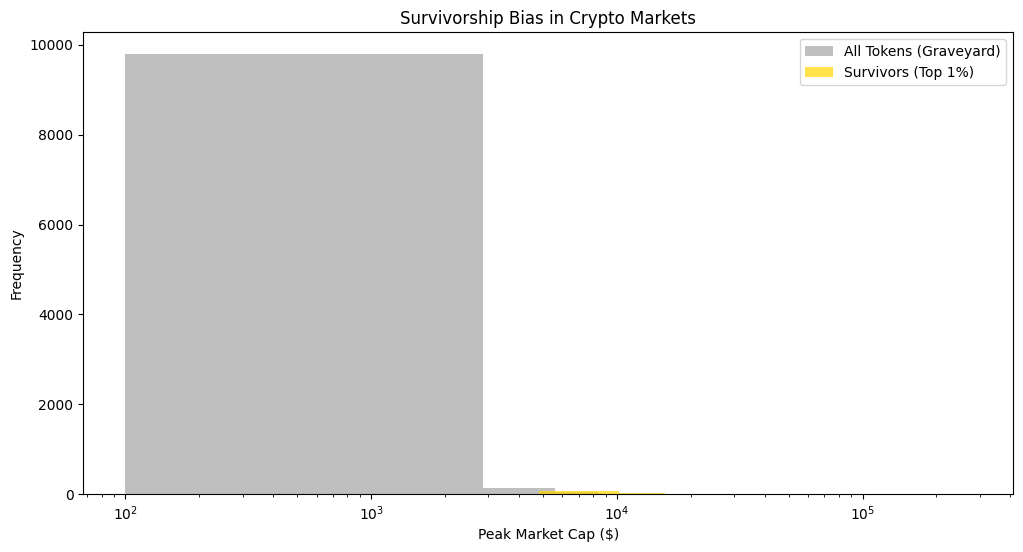

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate 10,000 token launches
n_tokens = 10000
shape = 1.16  # Pareto shape parameter
scale = 100   # Minimum market cap

# Generate using Pareto (Power Law)
market_caps = (np.random.pareto(shape, n_tokens) + 1) * scale

# Create df_all (The Graveyard)
df_all = pd.DataFrame({
    'token_id': range(1, n_tokens + 1),
    'peak_market_cap': market_caps
})

# Create df_survivors (Top 1%)
threshold = df_all['peak_market_cap'].quantile(0.99)
df_survivors = df_all[df_all['peak_market_cap'] >= threshold]

# Calculate means
mean_all = df_all['peak_market_cap'].mean()
mean_survivors = df_survivors['peak_market_cap'].mean()

print(f"Mean Market Cap (All Tokens): ${mean_all:,.2f}")
print(f"Mean Market Cap (Survivors Only): ${mean_survivors:,.2f}")
print(f"Survivorship Bias Inflation: {mean_survivors/mean_all:.2f}x")

# Dual histograms
plt.figure(figsize=(12, 6))
plt.hist(df_all['peak_market_cap'], bins=100, alpha=0.5, label='All Tokens (Graveyard)', color='gray')
plt.hist(df_survivors['peak_market_cap'], bins=50, alpha=0.7, label='Survivors (Top 1%)', color='gold')
plt.xlabel('Peak Market Cap ($)')
plt.ylabel('Frequency')
plt.title('Survivorship Bias in Crypto Markets')
plt.legend()
plt.xscale('log')
plt.show()